# Pirma Dalis

## 1.

In [500]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [501]:
pd.set_option('display.max_rows', 500)

## 2. Parsisiųsti 2020 ir 2021 įmonių “Juridinių asmenų duomenis

In [502]:
# Reading data
# ba - balanso ataskaita
ba2020_data = pd.read_csv(
    'https://www.registrucentras.lt//aduomenys//?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv')
ba2021_data = pd.read_csv(
    'https://www.registrucentras.lt//aduomenys//?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv')
# pna - pelno/nuostoliu ataskaita
pna2020_data = pd.read_csv(
    'https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv')
pna2021_data = pd.read_csv(
    'https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv')

In [503]:
# copying datasets to reduce request count in case dataset collapses.
ba2020 = ba2020_data.copy()
ba2021 = ba2021_data.copy()
pna2020 = pna2020_data.copy()
pna2021 = pna2021_data.copy()

In [504]:
# setting names on dataframes
ba2020.name = 'ba2020'
ba2021.name = 'ba2021'
pna2020.name = 'pna2020'
pna2021.name = 'pna2021'

# 3. 3. Susipažinkite su duomenimis

## a. Ką reiškia skirtingi duomenų laukai? Iš kokių atributų sudaryti duomenys?

In [505]:
# ba dataframe attributes
ba_att = pd.read_excel(
    'https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_BLNS_STR.xlsx', header=1)
ba_att

,Žymėjimas,Tipas,Atributo aprašymas
0,obj_kodas,decimal,juridinio asmens kodas Juridinių asmenų registre
1,obj_pav,string,juridinio asmens pavadinimas (individualių įmo...
2,form_kodas,decimal,juridinio asmens formos kodas
3,form_pav,string,juridinio asmens formos pavadinimas
4,stat_statusas,decimal,juridinio asmens teisinio statuso kodas
5,stat_pav,string,juridinio asmens teisinio statuso pavadinimas
6,template_id,decimal,ataskaitos rūšies kodas
7,template_name,string,ataskaitos rūšies pavadinimas
8,standard_id,decimal,FA dokumentų rinkinio kodas
9,standard_name,string,FA dokumentų rinkinio tipas


In [506]:
# pna dataframe attributes
pna_att = pd.read_excel(
    'https://www.registrucentras.lt/bylos/dokumentai/duomenys/aduomenys/JAR_FA_RODIKLIAI_PLNA_STR.xlsx', header=1)
pna_att

,Žymėjimas,Tipas,Atributo aprašymas
0,obj_kodas,decimal,juridinio asmens kodas Juridinių asmenų registre
1,obj_pav,string,juridinio asmens pavadinimas (individualių įmo...
2,form_kodas,decimal,juridinio asmens formos kodas
3,form_pav,string,juridinio asmens formos pavadinimas
4,stat_statusas,decimal,juridinio asmens teisinio statuso kodas
5,stat_pav,string,juridinio asmens teisinio statuso pavadinimas
6,template_id,decimal,ataskaitos rūšies kodas
7,template_name,string,ataskaitos rūšies pavadinimas
8,standard_id,decimal,FA dokumentų rinkinio kodas
9,standard_name,string,FA dokumentų rinkinio tipas


## b. Kiek reikšmių ir požymių turi kiekvienas iš dokumentų?

In [507]:
def get_features_and_values(df):
    name = df.name
    features = len(df.columns)
    values = len(df)
    return print(f'{name} dataset has:\n{features} features\n{values} values')

In [508]:
df_li = [ba2020, ba2021, pna2020, pna2021]

In [509]:
for df in df_li:
    get_features_and_values(df)
    print(' ')

ba2020 dataset has:
18 features
106318 values
 
ba2021 dataset has:
18 features
120850 values
 
pna2020 dataset has:
17 features
96616 values
 
pna2021 dataset has:
17 features
110227 values
 


## c. Kokio duomenų tipo yra kiekvienas iš požymių? Ar duomenų tipai tarp atitinkamų lentelių iš 2020 ir 2021 metų sutampa?


Duomenų tipus ir požymius galime matyti Pirmos dalies 3.a punkte.

## d. Paaiškinkite kas yra object duomenų tipas ir kuo jis skiriasi nuo string duomenų tipo.

Object duomenų tipas yra string arba string ir numeric verčių mišinys. pvz: data, kur turime skaičius ir brūkšnelius. Atpažinimo kodai kurie susideda iš raidžių ir skaičių. etc.

## e. Kuri lentelė turi daugiausiai nežinomų verčių? Kuris požymis išsiskiria nežinomų verčių skaičiumi?

In [510]:
# Iterating through frames to find out about nan values.
def Nan_info(df):
    name = df.name
    nanval = df.isna().sum().sum()
    maxval = df.isna().sum().sort_values(ascending=False)[:1][0]
    max_feat = df.isna().sum().sort_values(ascending=False)[:1].keys()[0]
    
    print(f'{name} dataset has {nanval} NaN values.\nFeature {max_feat} has the most Nan values,\nwith a total of {maxval}')

In [511]:
for df in df_li:
    Nan_info(df)
    print(' ')

ba2020 dataset has 17013 NaN values.
Feature mok_sumos_ir_isipareigojimai has the most Nan values,
with a total of 13644
 
ba2021 dataset has 24187 NaN values.
Feature mok_sumos_ir_isipareigojimai has the most Nan values,
with a total of 19670
 
pna2020 dataset has 47606 NaN values.
Feature pelnas_pries_apmokestinima has the most Nan values,
with a total of 30365
 
pna2021 dataset has 55858 NaN values.
Feature pelnas_pries_apmokestinima has the most Nan values,
with a total of 34755
 


Daugiausiai nežinomų verčių turi Pelno/Nuostolių ataskaitos.Požymis pelnas_pries_apmokestinima turi 55858 vertes, tiek 2020 tiek 2021 metais.

## f. Ar kažkuri lentelė turi pasikartojančių duomenų?

In [512]:
# Checking for duplicates.
def has_dupes(df):
    name = df.name
    dupes = df.duplicated().sum()

    if dupes > 0:
        print(f'{name} has duplicates. Amount {dupes}')
    else:
        print(f'{name} does not have duplicate values.')

In [513]:
for df in df_li:
    has_dupes(df)

ba2020 does not have duplicate values.
ba2021 does not have duplicate values.
pna2020 does not have duplicate values.
pna2021 does not have duplicate values.


Nei viena lentelė neturi pasikartojančių duomenų.

## i. Kokia stulpelių aibė vienareikšmiškai identifikuoja kiekvienos lentelės eilutę?

In [514]:
# Uniquity
ba2020[['obj_kodas','laikotarpis_nuo','laikotarpis_iki']].duplicated().sum()

0

Objekto kodas ir laikotarpis nuo iki parodo unikalumą šiame duomenų rinkinyje.

In [515]:
# Checking if dataframes are unique
def obj_nuo_iki_unique(df):
    name = df.name
    check = df[['obj_kodas','laikotarpis_nuo','laikotarpis_iki']].duplicated().sum()
    if check > 0:
        print(f"{name} dataset does not provide uniqueness through 'obj_kodas','laikotarpis_nuo','laikotarpis_iki'")
    else:
        print(f"{name} provides uniqueness through 'obj_kodas','laikotarpis_nuo','laikotarpis_iki'")

In [516]:
for df in df_li:
    obj_nuo_iki_unique(df)

ba2020 provides uniqueness through 'obj_kodas','laikotarpis_nuo','laikotarpis_iki'
ba2021 provides uniqueness through 'obj_kodas','laikotarpis_nuo','laikotarpis_iki'
pna2020 provides uniqueness through 'obj_kodas','laikotarpis_nuo','laikotarpis_iki'
pna2021 provides uniqueness through 'obj_kodas','laikotarpis_nuo','laikotarpis_iki'


Kaip matome datasete objekto kodas su laikotarpiu rėžiu nusako unikalumą duomenų šaltinyje.

# Antra dalis

## 4. Keletas juridinių asmenų pavadinimų yra tiesiogiai susiję su “Thermo Fisher” bendrove. Raskite pilnus šių bendrovių pavadinimus.

In [517]:
# names that match Thermo Fisher
ba2020[ba2020['obj_pav'].str.contains("Thermo Fisher")]['obj_pav'].unique()

array(['UAB "Thermo Fisher Scientific Vector Holdings"',
       'UAB "Thermo Fisher Scientific Baltics"',
       'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
       'UAB "Thermo Fisher Scientific Vector Senior Holdings II"'],
      dtype=object)

## 5. Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis - kiek procentų verčių pavyko atkurti skirtingose duomenyse?

In [518]:
def get_form_name(name: str):
    name = name.lower()
    if 'uždaroji akcinė' in name or 'uab' in name:
        return 'Uždaroji akcinė bendrovė'
    if 'mb' in name:
        return 'Mažoji bendrija'
    if 'všį' in name or 'viešoji' in name:
        return 'Viešoji įstaiga'
    if 'labdaros' in name or 'fondas' in name:
        return 'Labdaros ir paramos fondas'
    return 'Asociacija'

In [519]:
def get_reconstruct_percent(df):
    name = df.name
    length = len(df)  # Dataset length
    names = df['obj_pav'].apply(get_form_name) # Creating a series with modified name
    unmatched = len(df[~(df['form_pav'] == names)]) # Inverse search by name.
    
    percent = (unmatched/length)*100# Percent of matching error.
    
    print(f"{name} has a {round(percent,2)} % matching error with {unmatched} rows unmatched.")

In [520]:
for df in df_li:
    get_reconstruct_percent(df)

ba2020 has a 2.57 % matching error with 2735 rows unmatched.
ba2021 has a 3.17 % matching error with 3832 rows unmatched.
pna2020 has a 2.55 % matching error with 2468 rows unmatched.
pna2021 has a 3.11 % matching error with 3432 rows unmatched.


## 6. Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu)

In [521]:
# Concatted dataset with 2020 and 2021 values.
pna = pd.concat([pna2020, pna2021], axis=0)
pna.reset_index(inplace=True)
pna['pelnas_pries_apmokestinima'].fillna(0, inplace=True)
pna.drop(columns='index', axis=0, inplace=True)
pna['reg_date'] = pd.to_datetime(pna['reg_date'])
ba = pd.concat([ba2020, ba2021], axis=0)
ba.reset_index(inplace=True)
ba.drop(columns='index', axis=0, inplace=True)
ba['nuosavas_kapitalas'].fillna(0, inplace=True)
ba['reg_date'] = pd.to_datetime(ba['reg_date'])

In [522]:
# Unified the two datasets. Did not check for data leaks and breaks. (Probably a lot)
df = ba.merge(pna[['obj_kodas', 'laikotarpis_nuo', 'laikotarpis_iki', 'pelnas_pries_apmokestinima', 'grynasis_pelnas',
              'pardavimo_pajamos']], how='inner', on=['obj_kodas', 'laikotarpis_nuo', 'laikotarpis_iki'], indicator=False)
df.reset_index()
df['reg_date'] = pd.to_datetime(df['reg_date'])

In [523]:
df.groupby('form_pav')[['pelnas_pries_apmokestinima']].mean()

,pelnas_pries_apmokestinima
form_pav,
Akcinė bendrovė,2.720597e+06
Asociacija,-1.614179e+01
Biudžetinė įstaiga,8.121000e+03
Individuali įmonė,1.286950e+04
Komanditinė ūkinė bendrija,2.794042e+05
Kooperatinė bendrovė,3.853385e+04
Labdaros ir paramos fondas,4.538158e+01
"Lietuvos prekyb.,pramon. rūmų asociacija",0.000000e+00
Mažoji bendrija,6.624475e+03


In [524]:
df.groupby('form_pav')[['nuosavas_kapitalas']].mean()

,nuosavas_kapitalas
form_pav,
Akcinė bendrovė,4.131184e+07
Asociacija,1.125605e+05
Biudžetinė įstaiga,1.410740e+05
Individuali įmonė,1.213401e+05
Komanditinė ūkinė bendrija,3.185719e+06
Kooperatinė bendrovė,6.763677e+05
Labdaros ir paramos fondas,1.101702e+04
"Lietuvos prekyb.,pramon. rūmų asociacija",6.449100e+04
Mažoji bendrija,1.532266e+04


## 7. Atrinkti unikalias UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu visų UAB ir MB įmonių nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021 metai kartu).

In [525]:
#Getting median values for mb and uab firm types.
mb_median = df[df['form_pav'] == 'Mažoji bendrija'].groupby(
    'form_pav')['nuosavas_kapitalas'].median()[0]
uab_median = df[df['form_pav'] == 'Uždaroji akcinė bendrovė'].groupby(
    'form_pav')['nuosavas_kapitalas'].median()[0]

In [526]:
temp7 = df[(df['form_pav'] == 'Mažoji bendrija') | (
    ba['form_pav'] == 'Uždaroji akcinė bendrovė')]

C:\Users\clawl\AppData\Local\Temp\ipykernel_12720\2650558691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp7 = df[(df['form_pav'] == 'Mažoji bendrija') | (


In [527]:
temp7[(temp7['form_pav'] == 'Mažoji bendrija') & (temp7['nuosavas_kapitalas'] > mb_median) | (
    temp7['form_pav'] == 'Uždaroji akcinė bendrovė') & (temp7['nuosavas_kapitalas'] > uab_median)]

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
5,304259900,"UAB ""Algimta""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-05-29,696830.0,65998.0,190000.0,572599.0,2022-12-01,408758.0,347444.0,714534.0
6,304085969,"MB ""Mondri darbai""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2019-12-31,2020-03-31,69338.0,NaN,21415.0,108796.0,2022-12-01,79324.0,69137.0,482027.0
11,300621953,"Uždaroji akcinė bendrovė ""Gamafondas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST123,BALANSAS,...,2019-12-31,2020-05-26,10068479.0,6586089.0,16136731.0,516088.0,2022-12-01,0.0,0.0,NaN
12,304908897,"UAB ""Ineuras""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-08-05,79100.0,45937.0,0.0,123736.0,2022-12-01,80662.0,76622.0,200680.0
13,300136117,"UAB ""Kauno tekstilė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-04-20,40374.0,61060.0,0.0,101434.0,2022-12-01,7863.0,7690.0,352989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206823,305429608,MB Eldio,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-06-13,49001.0,NaN,723.0,79249.0,2022-12-01,48951.0,48951.0,168881.0
206826,302304325,"UAB ""Pixelmator Team""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-07-15,1949626.0,288715.0,391651.0,1846690.0,2022-12-01,379898.0,379898.0,1862402.0
206829,300584266,"UAB ""TPI Vilnius""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-27,130623.0,69485.0,11281.0,188135.0,2022-12-01,-2509.0,-2509.0,319859.0
206833,305281369,"UAB ""Modris""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-26,23311.0,139309.0,162600.0,20.0,2022-12-01,5181.0,4401.0,49536.0


## 8. Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes rekvizitai.vz.lt svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė, kurios “nuosavas_kapitalas” jums kelia įtarimų? 

In [528]:
# Getting only companies that belong to 1% by 'nuosavas_kapitalas'
df[df['nuosavas_kapitalas'] > df['nuosavas_kapitalas'].quantile(0.99)].sort_values(by='nuosavas_kapitalas', ascending=False)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos
146107,305115931,"UAB ""Thermo Fisher Scientific Vector Holdings""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-31,3.898038e+09,9.062000e+03,3.898045e+09,2345.0,2022-12-01,-1508.0,-1508.0,NaN
120157,305115970,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-31,3.898038e+09,1.148000e+04,3.898047e+09,2381.0,2022-12-01,-1463.0,-1463.0,NaN
112100,305115956,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-31,2.950793e+09,1.146558e+09,4.097346e+09,4881.0,2022-12-01,-49385070.0,-49385070.0,NaN
153959,188710638,Valstybės įmonė Lietuvos automobilių kelių dir...,110,Valstybės įmonė,0,Teisinis stat neįregistruotas,FS0132,Valstybės ir savivaldybės įmonių finansinių at...,BST504,BALANSAS,...,2020-12-31,2021-05-31,2.693140e+09,5.707500e+07,3.230581e+09,47480000.0,2022-12-01,1245000.0,940000.0,3975000.0
132953,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,...,2020-12-31,2021-05-20,1.950511e+09,NaN,1.754522e+09,199991000.0,2022-12-01,292397000.0,NaN,1069000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158416,301353547,"Uždaroji akcinė bendrovė ""Baltic Logistic Solu...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,...,2020-12-31,2021-05-26,6.964559e+06,3.837021e+06,5.310635e+06,5592687.0,2022-12-01,2884353.0,2702705.0,38519752.0
147284,302811727,"UAB ""Vievio paukščiai""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,...,2020-12-31,2021-09-08,6.956000e+06,1.802600e+07,1.708600e+07,8023000.0,2022-12-01,-1433000.0,-1202000.0,11586000.0
59834,304516437,"UAB ""LECA Lithuania""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST123,BALANSAS,...,2017-12-31,2020-01-08,6.952433e+06,2.661290e+05,6.073268e+06,1156622.0,2022-12-01,-496122.0,-496122.0,2661524.0
52111,165670049,UAB Šešupės ūkis,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,...,2019-12-31,2020-05-22,6.945490e+06,1.396142e+06,6.956510e+06,1708484.0,2022-12-01,-33614.0,-15549.0,2858028.0


## 9. Vizualiai atvaizduoti juridinių asmenų formos pasiskirstymą per visą laikotarpį (2020 ir 2021 metais kartu). Vizualizacijos turi sutapti su pavaizduota dešinėje.

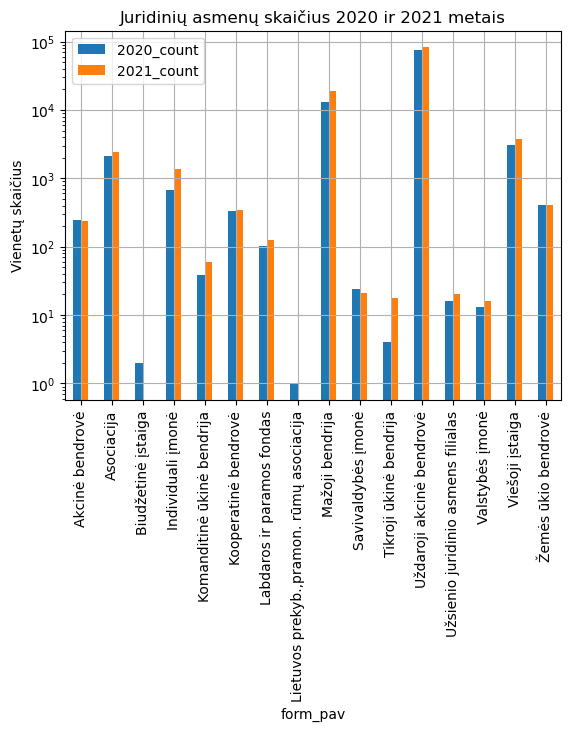

In [529]:
# Pandas approach. Did not complete matplotlib and seaborn saddly.
df.groupby(['form_pav',df['reg_date'].dt.year])['obj_pav'].count().unstack().plot(kind='bar', logy=True, grid=True)
plt.title('Juridinių asmenų skaičius 2020 ir 2021 metais')
plt.ylabel('Vienetų skaičius')
plt.legend(['2020_count','2021_count'])

## 10. Kurį mėnesį buvo įregistruota daugiausiai juridinių asmenų 2020 ir 2021 metais? Atvaizduokite stulpelinę diagramą.

Text(0, 0.5, 'Juridinių asmenų sk.')

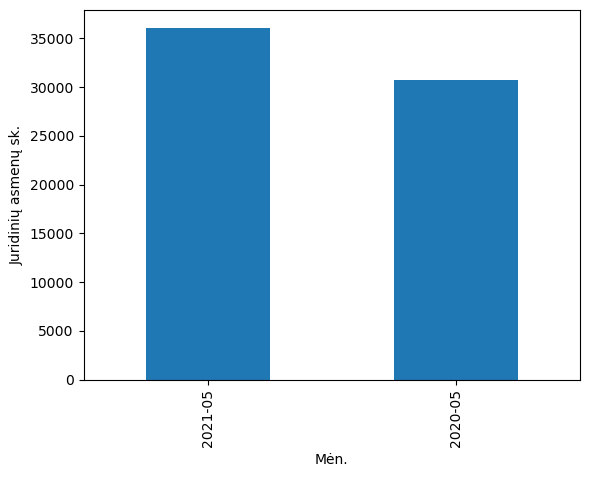

In [530]:
df.groupby(['form_pav',df['reg_date'].dt.to_period('M')])['obj_pav'].count().unstack().sum().sort_values(ascending=False)[:2].plot(kind='bar')
plt.xlabel('Mėn.')
plt.ylabel('Juridinių asmenų sk.')

## 11. Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais.

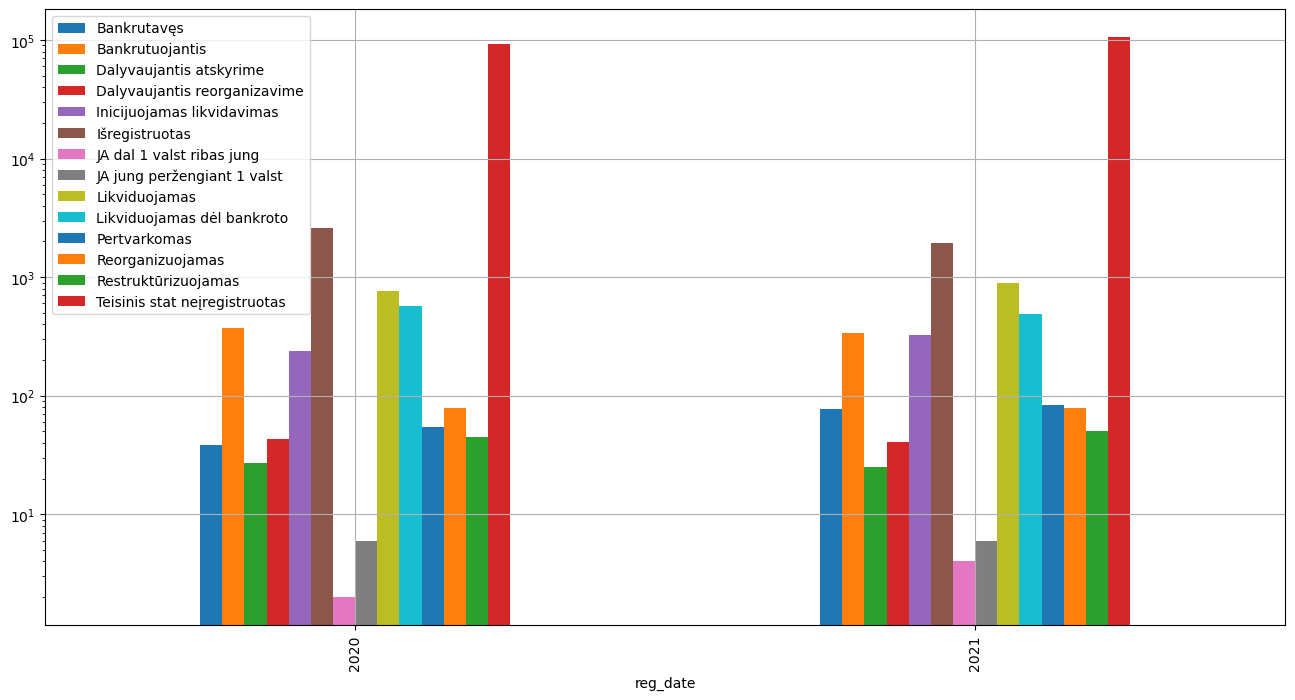

In [531]:
df.groupby([df['reg_date'].dt.year, 'stat_pav'])['obj_pav'].count().unstack().plot(kind='bar', figsize=(16,8), logy=True, grid=True)
plt.legend()

## 12. Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis stulpelinėje diagramoje.

In [532]:
df['pajamos'] =  df['grynasis_pelnas'] + df['nuosavas_kapitalas']

In [533]:
tend = pd.merge(
    df.loc[df['reg_date'].dt.year == 2020].groupby('obj_kodas')['pajamos'].sum(),
    df.loc[df['reg_date'].dt.year == 2021].groupby('obj_kodas')['pajamos'].sum(),
    how='inner',
    on='obj_kodas',
    suffixes=['2020', '2021']
)
tend.fillna(0, inplace=True)

In [534]:
def tendency(x:int):
    if x > 0:
        return 'teigiama'
    return 'neigiama'

In [535]:
tend['difference'] = tend['pajamos2020'] - tend['pajamos2021']
tend['tendency'] = tend['difference'].apply(tendency)
tend.reset_index(inplace=True)

In [536]:
df = pd.merge(df,tend[['obj_kodas','tendency']],how='left',on='obj_kodas')

Text(0.5, 0, 'Tendencija')

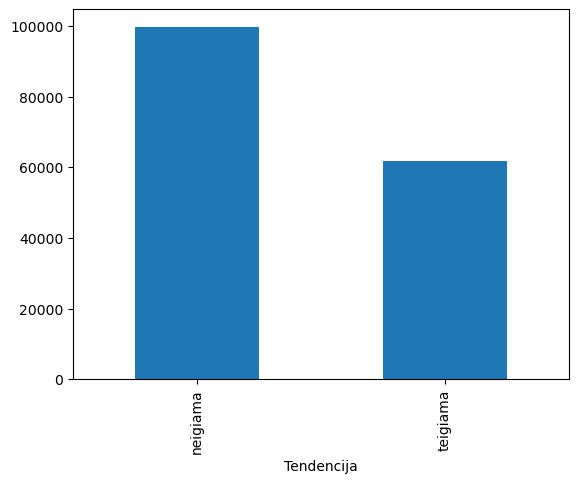

In [537]:
df.groupby('tendency')['obj_kodas'].count().plot(kind='bar')
plt.xlabel('Tendencija')

## 13. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis.

In [538]:
uabmb = df[df['form_pav'].isin(['Uždaroji akcinė bendrovė','Mažoji bendrija'])]

In [539]:
# bankrupt filter
bankrupt = ['Išregistruotas', 'Likviduojamas',
            'Likviduojamas dėl bankroto', 'Bankrutuojantis',
            'Inicijuojamas likvidavimas', 'Bankrutavęs'] 
# companies working in 2020
working = uabmb.loc[(uabmb['reg_date'].dt.year == 2020) & (
    uabmb['stat_pav'].isin(['Teisinis stat neįregistruotas']))]['obj_kodas']

In [540]:
# Bankrupt company codes in 2021
bankrupted = uabmb.loc[(uabmb['reg_date'].dt.year == 2021) & (
    uabmb['stat_pav'].isin(bankrupt))][['obj_kodas', 'stat_pav']]

In [541]:
# Tried merging with inner to find companies that worked in 2020 but are bankrupt in 2021.
pd.merge(working,bankrupted,how='left',on='obj_kodas')

,obj_kodas,stat_pav
0,305217929,NaN
1,304759186,NaN
2,304512862,NaN
3,222022510,NaN
4,304085969,NaN
...,...,...
84943,302442493,NaN
84944,302564216,NaN
84945,300613091,NaN
84946,304213995,NaN


## 14. Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”

In [542]:
df['trumpalaikis_turtas'].fillna(0, inplace=True)
df['ilgalaikis_turtas'].fillna(0, inplace=True)

In [543]:
df['turtas'] = df['trumpalaikis_turtas'] + df['ilgalaikis_turtas']

In [544]:
bins = [0, 3000, 20_000, 35_000, 70_000, df['turtas'].max()]

In [545]:
df['grupe'] =  pd.cut(df['turtas'], bins=bins)

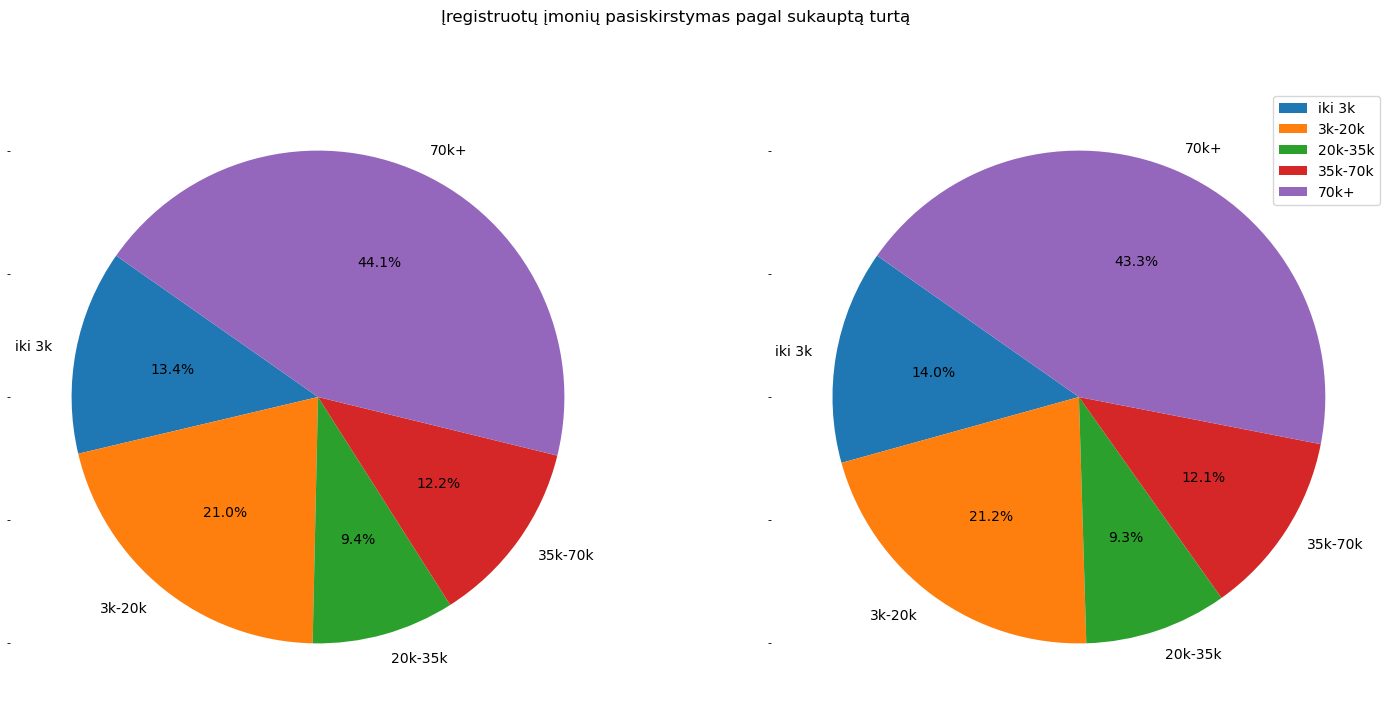

In [546]:
fig, axes = plt.subplots(1,2, figsize=(18,8), sharey=True)
labels = ['iki 3k', '3k-20k', '20k-35k', '35k-70k', '70k+'] # Labels for pie chart
df[df['reg_date'].dt.year == 2020].groupby([df['reg_date'].dt.year, df['grupe']])[
    'obj_kodas'].count().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], labels=labels, startangle=145, ylabel='', xlabel='')
df[df['reg_date'].dt.year == 2021].groupby([df['reg_date'].dt.year, df['grupe']])[
    'obj_kodas'].count().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], labels=labels, startangle=145)
plt.suptitle('Įregistruotų įmonių pasiskirstymas pagal sukauptą turtą') # Title for figure not subplots
plt.legend(labels) # Adding legend

## 15. Rasti TOP-100 pelningiausių įmonių pagal “grynasis pelnas” ir TOP-100 įmonių kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose? Skaičiuojant TOP įmonės įtraukti viso laikotarpio įmones (naudoti 2020 ir 2021 metų duomenis kartu).

In [547]:
#TOP 100 by income.
top100gp = df.groupby('obj_pav')[['grynasis_pelnas']].sum().sort_values(by='grynasis_pelnas', ascending=False).reset_index()[:100]

In [548]:
#TOP 100 by capital
top100nk = df.groupby('obj_pav')[['nuosavas_kapitalas']].sum().sort_values(by='nuosavas_kapitalas', ascending=False).reset_index()[:100]

In [549]:
# Company count that shows up in both
len(top100gp[top100gp['obj_pav'].isin(top100nk['obj_pav'].tolist())])

41

## 16. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020 ir 2021 metais? Kurios įmonės iškrenta iš TOP sąrašo 2021 metais?

In [550]:
#Top 100 income 2020 and 2021
top100gp2020 = df[df['reg_date'].dt.year == 2020].groupby('obj_pav')[['grynasis_pelnas']].sum().sort_values(by='grynasis_pelnas', ascending=False).reset_index()[:100]
top100gp2021 = df[df['reg_date'].dt.year == 2021].groupby('obj_pav')[['grynasis_pelnas']].sum().sort_values(by='grynasis_pelnas', ascending=False).reset_index()[:100]

In [551]:
# Companies that drop out in 2021
top20butnot21 = top100gp2020[~top100gp2020.isin(top100gp2021['obj_pav'].tolist())].dropna()
top20butnot21[['obj_pav']]

,obj_pav
5,"UAB ""ERA Family"""
6,Technopolis Lietuva UAB
16,"UAB ""Schage Real Estate"""
18,"Uždaroji akcinė bendrovė ""VAKARŲ MEDIENOS GRUPĖ"""
19,"UAB ""Panorama LT"""
24,"Akcinė bendrovė ""Invalda INVL"""
33,"UAB ""Avion Express"""
36,"UAB ""GetJet Airlines"""
37,"UAB ""FELIT"""
39,"UAB ""ME HOLDING NT"""


# Trečia dalis

## 1. Jums prieinamą finansinę informaciją papildykite

In [552]:
# Column mapper by task
cols = pd.read_csv('3_uzduotis_data_sample.csv').columns

In [553]:
# Bandymas su apply pasidaryti metų columns, tačiau labai ilgai krovėsi.
#def get_2020_nuosavas_kapitalas(obj:int):
#    getsum = float(df[(df['obj_kodas'] == obj) & (df['reg_date'].dt.year == 2020)].groupby('obj_kodas')['nuosavas_kapitalas'].sum())
#    return getsum

In [554]:
# Bruteforce is better than nothing.
features = [
    df[df['reg_date'].dt.year == 2020].groupby('obj_kodas')[['nuosavas_kapitalas']].sum(
    ).rename(columns={'nuosavas_kapitalas': 'nuosavas_kapitalas_20'}).reset_index()
    ,df[df['reg_date'].dt.year == 2021].groupby('obj_kodas')[['nuosavas_kapitalas']].sum(
    ).rename(columns={'nuosavas_kapitalas': 'nuosavas_kapitalas_21'}).reset_index()
    ,df[df['reg_date'].dt.year == 2020].groupby('obj_kodas')[['mok_sumos_ir_isipareigojimai']].sum(
    ).rename(columns={'mok_sumos_ir_isipareigojimai': 'mok_sumos_ir_isipareigojimai_20'}).reset_index()
    ,df[df['reg_date'].dt.year == 2021].groupby('obj_kodas')[['mok_sumos_ir_isipareigojimai']].sum(
    ).rename(columns={'mok_sumos_ir_isipareigojimai': 'mok_sumos_ir_isipareigojimai_21'}).reset_index()
    ,df[df['reg_date'].dt.year == 2020].groupby('obj_kodas')[['ilgalaikis_turtas']].sum(
    ).rename(columns={'ilgalaikis_turtas': 'ilgalaikis_turtas_20'}).reset_index()
    ,df[df['reg_date'].dt.year == 2021].groupby('obj_kodas')[['ilgalaikis_turtas']].sum(
    ).rename(columns={'ilgalaikis_turtas': 'ilgalaikis_turtas_21'}).reset_index()
    ,df[df['reg_date'].dt.year == 2020].groupby('obj_kodas')[['trumpalaikis_turtas']].sum(
    ).rename(columns={'trumpalaikis_turtas': 'trumpalaikis_turtas_20'}).reset_index()
    ,df[df['reg_date'].dt.year == 2021].groupby('obj_kodas')[['trumpalaikis_turtas']].sum(
    ).rename(columns={'trumpalaikis_turtas': 'trumpalaikis_turtas_21'}).reset_index()
    ,df[df['reg_date'].dt.year == 2020].groupby('obj_kodas')[['pardavimo_pajamos']].sum(
    ).rename(columns={'pardavimo_pajamos': 'pardavimo_pajamos_20'}).reset_index()
    ,df[df['reg_date'].dt.year == 2021].groupby('obj_kodas')[['pardavimo_pajamos']].sum(
    ).rename(columns={'pardavimo_pajamos': 'pardavimo_pajamos_21'}).reset_index()
    ,df[df['reg_date'].dt.year == 2020].groupby('obj_kodas')[['grynasis_pelnas']].sum(
    ).rename(columns={'grynasis_pelnas': 'grynasis_pelnas_20'}).reset_index()
    ,df[df['reg_date'].dt.year == 2021].groupby('obj_kodas')[['grynasis_pelnas']].sum(
    ).rename(columns={'grynasis_pelnas': 'grynasis_pelnas_21'}).reset_index()
]

In [555]:
# Merging original df with subdataframes
for feat in features:
    df = pd.merge(df,feat,on='obj_kodas',how='left')

In [556]:
# Neleidžia nuskaityti iš interneto, HTTP request 403
#pd.read_csv('https://atvira.sodra.lt/imones/downloads/2018/monthly-2018.csv.zip', compression='zip')

Atsiunčiami 2020 metų duomenys.

In [557]:
# Copying dataframe in case of breaking.
sod = df.copy()

In [558]:
# Remapping verbose feature names into more concise.
sod_map = {
    'Draudėjo kodas (code)':'code',
    'Juridinių asmenų registro kodas (jarCode)':'obj_kodas',
    'Pavadinimas (name)':'name',
    'Savivaldybė, kurioje registruota(municipality)':'savivaldybe',
    'Ekonominės veiklos rūšies kodas(ecoActCode)':'veiklos_kodas',
    'Ekonominės veiklos rūšies pavadinimas(ecoActName)':'veiklos_aprasymas',
    'Mėnuo (month)':'date',
    'Vidutinis darbo užmokestis (avgWage)':'avgWage',
    'Apdraustųjų skaičius (numInsured)':'employee_count',
    'Vidutinis darbo užmokestis II (avgWage2)':'avgWage2',
    'Apdraustųjų skaičius II (numInsured2)':'employee_count2',
    'Valstybinio socialinio draudimo įmoka (tax)':'tax'
}

In [559]:
# Setting DataFrames 
sod20 = pd.read_csv('monthly-2020.csv', sep=';')
sod21 = pd.read_csv('monthly-2021.csv', sep=';')

In [560]:
# Remapping dataframes
sod20.rename(sod_map, axis=1, inplace=True)
sod21.rename(sod_map, axis=1, inplace=True)

In [561]:
# Filtering data that does not contain obj_kodas since its the unique key that i will join data on. 
sod20 = sod20[sod20['obj_kodas'].notna()]
sod21 = sod21[sod21['obj_kodas'].notna()]

In [562]:
# Ugly way to parse data, but it's what worked.
def to_dt(x):
    s = str(x)
    date = pd.to_datetime(s[:4] + '-' + s[-2:])
    return date

In [563]:
# Applying dt parsing.
sod20['date'] = sod20['date'].apply(to_dt)
sod21['date'] = sod21['date'].apply(to_dt)

In [564]:
# Employees
emp20 = sod20[sod20['date'].dt.month == 12].groupby(
    'obj_kodas')[['employee_count']].sum().reset_index().rename(columns={'employee_count': 'darbuotoju_skaicius_20'})
emp21 = sod21[sod21['date'].dt.month == 12].groupby(
    'obj_kodas')[['employee_count']].sum().reset_index().rename(columns={'employee_count': 'darbuotoju_skaicius_21'})
# Average wages
avg20 = sod20.groupby('obj_kodas')[['avgWage']].mean().reset_index().rename(
    columns={'avgWage': 'vid_atlyginimas_20'})
avg21 = sod21.groupby('obj_kodas')[['avgWage']].mean().reset_index().rename(
    columns={'avgWage': 'vid_atlyginimas_21'})
# information
info = sod21[['obj_kodas', 'savivaldybe', 'veiklos_kodas',
              'veiklos_aprasymas']].drop_duplicates()

features2 = [emp20, emp21, avg20, avg21, info]

In [565]:
for feat in features2:
    sod = pd.merge(sod,feat,on='obj_kodas',how='left')

In [566]:
sod = sod[cols]

## 2. Galutinis duomenų masyvas turi atrodyti kaip 3_uzduotis_data_sample.csv.

In [567]:
sod.head(2)

,obj_kodas,obj_pav,form_pav,veiklos_kodas,veiklos_aprasymas,savivaldybe,nuosavas_kapitalas_20,mok_sumos_ir_isipareigojimai_20,ilgalaikis_turtas_20,trumpalaikis_turtas_20,...,vid_atlyginimas_20,darbuotoju_skaicius_20,nuosavas_kapitalas_21,mok_sumos_ir_isipareigojimai_21,ilgalaikis_turtas_21,trumpalaikis_turtas_21,pardavimo_pajamos_21,grynasis_pelnas_21,vid_atlyginimas_21,darbuotoju_skaicius_21
0,305217929,"MB ""Jantaris""",Mažoji bendrija,NaN,NaN,NaN,1610.0,0.0,0.0,1684.0,...,NaN,NaN,1909.0,0.0,0.0,1925.0,1903.0,299.0,NaN,NaN
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",Asociacija,855200.0,Kultūrinis švietimas,Alytaus r. sav.,243.0,0.0,0.0,243.0,...,NaN,1.0,0.0,0.0,0.0,431.0,0.0,0.0,NaN,1.0


## Užduotys

### 1. Išsiaiškinkite micro ir mažos įmonės apibrėžimą.

### 2. Remdamiesi apibrėžimu išfiltruokite micro ir mažas įmones. Įmonės turi turėti statusą MB arba UAB.

In [568]:
sodf = sod[(
    sod['form_pav'].isin(['Uždaroji akcinė bendrovė', ' Mažoji bendrija'])) &
    (sod['pardavimo_pajamos_21'] < 10_000_000) & # Filtras skirtas Mažoms ir mikro įmonėms.
    (sod['pardavimo_pajamos_21'] > 10_000) & # Aktualios įmonės kurios turi bent 10k pajamų.
    (sod['pardavimo_pajamos_20'] > 10_000) & # Nufiltruojame mažo pelno įmones iš praitų metų kad negadintu 21 metų augimo.
    (sod['vid_atlyginimas_20'] > 642) & # Išfiltruojamos įmonės mokėjusios mažesnį nei minimalų atlygį.
    (sod['vid_atlyginimas_21'] < 10_000) & # Keletas įmonių turėjo net 30k atlyginimus 12mėn. Išfiltruojami bonusai.
    (sod['darbuotoju_skaicius_21'] < 50) # Filtras skirtas Mažoms ir mikro įmonėms.
].copy()

### 3. Indentifikuokite labiausiai augusias įmones.

In [569]:
sodf['pardavimo_augimas_21'] = (sodf['pardavimo_pajamos_21'] - sodf['pardavimo_pajamos_20']) / sodf['pardavimo_pajamos_20'] * 100

In [570]:
sodf['darbuotoju_augimas_21'] = (sodf['darbuotoju_skaicius_21'] - sodf['darbuotoju_skaicius_20']) / sodf['darbuotoju_skaicius_20'] * 100

In [571]:
sodf['vid_atlyginimas_augimas_21'] = (sodf['vid_atlyginimas_21'] - sodf['vid_atlyginimas_20']) / sodf['vid_atlyginimas_20'] * 100

In [572]:
top100sales =  sodf[['obj_pav','pardavimo_augimas_21']].replace(np.inf,0).sort_values(by = 'pardavimo_augimas_21', ascending=False).drop_duplicates().round()[:100]

In [573]:
top100emps =  sodf[['obj_pav','darbuotoju_augimas_21']].replace(np.inf,0).sort_values(by = 'darbuotoju_augimas_21', ascending=False).drop_duplicates().round()[:100]

In [574]:
top100wgs =  sodf[['obj_pav','vid_atlyginimas_augimas_21']].replace(np.inf,0).sort_values(by = 'vid_atlyginimas_augimas_21', ascending=False).drop_duplicates().round()[:100]

In [575]:
pd.merge((pd.merge(top100sales,top100wgs,on='obj_pav',how='left')),top100emps,on='obj_pav',how='left')

,obj_pav,pardavimo_augimas_21,vid_atlyginimas_augimas_21,darbuotoju_augimas_21
0,"UAB ""Gedimino 22 turtas""",18302.0,NaN,NaN
1,"UAB ""Eigera""",14115.0,NaN,NaN
2,UAB Beleza Medica,11113.0,95.0,NaN
3,"UAB ""Plasteks""",6645.0,NaN,NaN
4,"UAB ""Statybos investicijų valdymas""",5637.0,NaN,NaN
5,"UAB ""Freidesk""",5533.0,NaN,NaN
6,UAB 2 AK,5154.0,119.0,NaN
7,VEESLA UAB,3973.0,NaN,NaN
8,"UAB ""JV ALU""",3434.0,NaN,NaN
9,"UAB ""Top grupė""",3420.0,NaN,NaN


### 4. Sukurkite kriterijus, ir atrinkite top 10, jūsų manymu geriausių įmonių.

In [576]:
top100sales[:10]

,obj_pav,pardavimo_augimas_21
194544,"UAB ""Gedimino 22 turtas""",18302.0
154181,"UAB ""Eigera""",14115.0
86184,UAB Beleza Medica,11113.0
99092,"UAB ""Plasteks""",6645.0
199580,"UAB ""Statybos investicijų valdymas""",5637.0
13946,"UAB ""Freidesk""",5533.0
101291,UAB 2 AK,5154.0
9705,VEESLA UAB,3973.0
42823,"UAB ""JV ALU""",3434.0
8563,"UAB ""Top grupė""",3420.0


### 5. Kokia suma įvertintumėt savo atrinktas įmones?

20 mln eur.

In [1]:
#conda env export > environment.yml